In [1]:
# -*- coding: utf-8 -*-
"""
@File  : mean.py
@author: FxDr
@Time  : 2023/12/28 19:12
@Description:
"""
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
from collections import Counter

import warnings

warnings.filterwarnings("ignore")

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# 选择训练集与测试集的数据,下载数据集
train_data = torchvision.datasets.CIFAR10('../../data', train=True,
                                          download=False, transform=transform_train)
test_data = torchvision.datasets.CIFAR10('../../data', train=False,
                                         download=False, transform=transform_test)

# 训练集的标签
train_label = train_data.targets
print('len(train_label)', len(train_label))

len(train_label) 50000


In [2]:
# 测试集的标签
test_label = test_data.targets
print('len(test_label)', len(test_label))

len(test_label) 10000


In [5]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=1)

# 训练集
train_image = train_data.data
train_image.shape

(50000, 32, 32, 3)

In [12]:
train_label = train_data.targets
print(train_label[:5])
len(train_label)

[6, 9, 9, 4, 1]


50000

In [14]:
train_data.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [15]:
train_data_image = train_image.reshape(50000, 1024, 3)
train_data_image.shape

(50000, 1024, 3)

In [16]:
x_train_gray = np.mean(train_data_image, axis=2)

# 测试集
test_image = test_data.data
len(test_image)

10000

In [17]:
test_data_image = test_image.reshape(10000, 1024, 3)
y_test_gray = np.mean(test_data_image, axis=2)

In [18]:
# 训练集数据标准化
scaler = StandardScaler()
image_scaler = scaler.fit_transform(x_train_gray)
image_scaler.shape

(50000, 1024)

In [19]:
# 选择聚类数
k = 10
kmeans = KMeans(n_clusters=k)
kmeans.fit(image_scaler)

KMeans(n_clusters=10)

In [23]:
print('训练集的聚类标签')
y_predict = kmeans.fit_predict(image_scaler)
y_predict[:10]

array([4, 4, 5, 2, 1, 1, 8, 8, 7, 1])

训练集的聚类标签


array([0, 0, 5, 3, 6, 6, 2, 2, 4, 6])

In [25]:
from collections import Counter

# 统计每个值的数量
counts = Counter(y_predict)

# 输出统计结果
for label, count in counts.items():
    print(f"聚类标签 {label}: {count} 个图像")

"共5万张"

聚类标签 0: 6054 个图像
聚类标签 5: 5273 个图像
聚类标签 3: 4802 个图像
聚类标签 6: 6597 个图像
聚类标签 2: 7349 个图像
聚类标签 4: 4487 个图像
聚类标签 7: 3543 个图像
聚类标签 9: 4210 个图像
聚类标签 8: 5050 个图像
聚类标签 1: 2635 个图像


'共5万张'

In [30]:
from collections import Counter

# 统计每个值的数量
counts = Counter(train_label)

# 输出统计结果
for label, count in counts.items():
    print(f"标签 {label}: {count} 个图像")

"共5万张"

标签 6: 5000 个图像
标签 9: 5000 个图像
标签 4: 5000 个图像
标签 1: 5000 个图像
标签 2: 5000 个图像
标签 7: 5000 个图像
标签 8: 5000 个图像
标签 3: 5000 个图像
标签 5: 5000 个图像
标签 0: 5000 个图像


'共5万张'

In [32]:
{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [53]:
train_label[30]  # 飞机

0

In [54]:
y_predict[30]

0

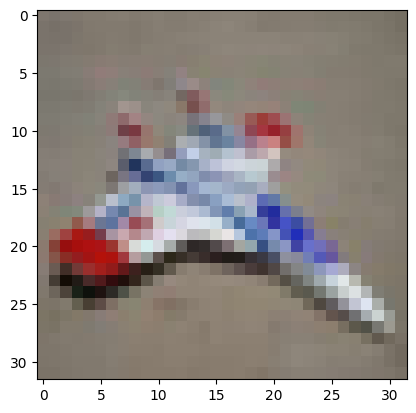

In [51]:
import matplotlib.pyplot as plt

plt.imshow(train_image[30])
plt.show()

In [55]:
number_class = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

number_0 = []
number_1 = []
number_2 = []
number_3 = []
number_4 = []
number_5 = []
number_6 = []
number_7 = []
number_8 = []
number_9 = []
i = 0
for result in y_predict:
    if result == 0:
        number_0.append(i)
    if result == 1:
        number_1.append(i)
    if result == 2:
        number_2.append(i)
    if result == 3:
        number_3.append(i)
    if result == 4:
        number_4.append(i)
    if result == 5:
        number_5.append(i)
    if result == 6:
        number_6.append(i)
    if result == 7:
        number_7.append(i)
    if result == 8:
        number_8.append(i)
    if result == 9:
        number_9.append(i)
    i += 1

"""
得到了测试集预测的聚类标签的数量
"""
print(len(number_0))
print(len(number_1))
print(len(number_2))
print(len(number_3))
print(len(number_4))
print(len(number_5))
print(len(number_6))
print(len(number_7))
print(len(number_8))
print(len(number_9))

6054
2635
7349
4802
4487
5273
6597
3543
5050
4210


In [59]:
number_0[:10]

[0, 1, 30, 33, 39, 44, 46, 51, 58, 60]

In [68]:
total_err = 0

num = [number_0, number_1, number_2, number_3, number_4,
       number_5, number_6, number_7, number_8, number_9]

max_lable = []
for index_list in num:
    jishu = []
    for index in index_list:
        # 得到实际原标签lo
        lo = train_label[index]
        jishu.append(lo)
    print(Counter(jishu))
    tem = Counter(jishu).most_common()
    max_lable.append(tem[0][0])
max_lable

Counter({5: 1009, 1: 858, 8: 784, 3: 624, 6: 594, 7: 498, 0: 452, 2: 432, 4: 403, 9: 400})
Counter({0: 947, 2: 375, 3: 260, 8: 203, 1: 170, 5: 163, 6: 161, 4: 120, 9: 120, 7: 116})
Counter({2: 1067, 7: 1034, 4: 919, 6: 814, 3: 723, 5: 722, 9: 594, 0: 555, 1: 542, 8: 379})
Counter({6: 1096, 3: 680, 2: 610, 4: 583, 5: 533, 1: 471, 7: 294, 0: 215, 8: 179, 9: 141})
Counter({5: 778, 0: 671, 3: 595, 2: 578, 4: 483, 7: 446, 8: 414, 6: 283, 1: 129, 9: 110})
Counter({9: 1657, 8: 847, 1: 708, 7: 593, 0: 466, 3: 257, 4: 236, 2: 226, 5: 155, 6: 128})
Counter({6: 1003, 4: 916, 1: 841, 2: 820, 9: 648, 3: 642, 7: 634, 5: 496, 0: 306, 8: 291})
Counter({9: 557, 0: 508, 7: 467, 1: 405, 6: 350, 3: 329, 2: 308, 5: 235, 8: 215, 4: 169})
Counter({4: 974, 5: 798, 3: 749, 7: 734, 6: 520, 1: 395, 2: 371, 8: 205, 9: 157, 0: 147})
Counter({8: 1483, 0: 733, 9: 616, 1: 481, 2: 213, 4: 197, 7: 184, 3: 141, 5: 111, 6: 51})


[5, 0, 2, 6, 5, 9, 6, 9, 4, 8]

In [74]:
i = 0
for index_list in num:
    for index in index_list:
        # 得到预测标签
        lo = y_predict[index]
        if lo == max_lable[i]:
            total_err += 1
    i += 1

total_err

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


41838

In [64]:
max_lable

[5, 0, 2, 6, 5, 9, 6, 9, 4, 8]

In [70]:
y_predict[:10]

array([0, 0, 5, 3, 6, 6, 2, 2, 4, 6])

In [65]:
from collections import defaultdict

# 初始化字典，用于统计每个聚类标签对应的真实标签的数量
cluster_label_counts = defaultdict(lambda: defaultdict(int))

# 遍历每个样本
for true_label, predicted_label in zip(train_label, y_predict):
    # 统计数量
    cluster_label_counts[predicted_label][true_label] += 1

# 打印结果
for cluster_label, counts in cluster_label_counts.items():
    print(f"聚类标签: {cluster_label}")
    for true_label, count in counts.items():
        print(f"    真实标签 {true_label}: {count} 个图像")

聚类标签: 0
    真实标签 6: 594 个图像
    真实标签 9: 400 个图像
    真实标签 0: 452 个图像
    真实标签 3: 624 个图像
    真实标签 1: 858 个图像
    真实标签 5: 1009 个图像
    真实标签 4: 403 个图像
    真实标签 8: 784 个图像
    真实标签 7: 498 个图像
    真实标签 2: 432 个图像
聚类标签: 5
    真实标签 9: 1657 个图像
    真实标签 7: 593 个图像
    真实标签 6: 128 个图像
    真实标签 3: 257 个图像
    真实标签 5: 155 个图像
    真实标签 8: 847 个图像
    真实标签 1: 708 个图像
    真实标签 2: 226 个图像
    真实标签 0: 466 个图像
    真实标签 4: 236 个图像
聚类标签: 3
    真实标签 4: 583 个图像
    真实标签 2: 610 个图像
    真实标签 3: 680 个图像
    真实标签 6: 1096 个图像
    真实标签 5: 533 个图像
    真实标签 7: 294 个图像
    真实标签 1: 471 个图像
    真实标签 0: 215 个图像
    真实标签 8: 179 个图像
    真实标签 9: 141 个图像
聚类标签: 6
    真实标签 1: 841 个图像
    真实标签 3: 642 个图像
    真实标签 9: 648 个图像
    真实标签 6: 1003 个图像
    真实标签 2: 820 个图像
    真实标签 0: 306 个图像
    真实标签 7: 634 个图像
    真实标签 5: 496 个图像
    真实标签 4: 916 个图像
    真实标签 8: 291 个图像
聚类标签: 2
    真实标签 2: 1067 个图像
    真实标签 7: 1034 个图像
    真实标签 3: 723 个图像
    真实标签 4: 919 个图像
    真实标签 1: 542 个图像
    真实标签 5: 722 个图像
    真实标签 6: 814 个图像
    真实标签 9: 59

In [63]:
from collections import defaultdict

# 初始化字典，用于统计每个真实标签对应的聚类标签的数量
label_counts = defaultdict(lambda: defaultdict(int))

# 遍历每个样本
for true_label, predicted_label in zip(train_label, y_predict):
    # 统计数量
    label_counts[true_label][predicted_label] += 1

# 打印结果
for true_label, counts in label_counts.items():
    print(f"真实标签: {true_label}")
    for cluster_label, count in counts.items():
        print(f"    聚类标签 {cluster_label}: {count} 个图像")

真实标签: 6
    聚类标签 0: 594 个图像
    聚类标签 8: 520 个图像
    聚类标签 3: 1096 个图像
    聚类标签 6: 1003 个图像
    聚类标签 5: 128 个图像
    聚类标签 2: 814 个图像
    聚类标签 4: 283 个图像
    聚类标签 7: 350 个图像
    聚类标签 9: 51 个图像
    聚类标签 1: 161 个图像
真实标签: 9
    聚类标签 0: 400 个图像
    聚类标签 5: 1657 个图像
    聚类标签 6: 648 个图像
    聚类标签 9: 616 个图像
    聚类标签 8: 157 个图像
    聚类标签 7: 557 个图像
    聚类标签 2: 594 个图像
    聚类标签 1: 120 个图像
    聚类标签 3: 141 个图像
    聚类标签 4: 110 个图像
真实标签: 4
    聚类标签 3: 583 个图像
    聚类标签 1: 120 个图像
    聚类标签 2: 919 个图像
    聚类标签 0: 403 个图像
    聚类标签 8: 974 个图像
    聚类标签 4: 483 个图像
    聚类标签 6: 916 个图像
    聚类标签 9: 197 个图像
    聚类标签 5: 236 个图像
    聚类标签 7: 169 个图像
真实标签: 1
    聚类标签 6: 841 个图像
    聚类标签 0: 858 个图像
    聚类标签 2: 542 个图像
    聚类标签 4: 129 个图像
    聚类标签 1: 170 个图像
    聚类标签 5: 708 个图像
    聚类标签 3: 471 个图像
    聚类标签 7: 405 个图像
    聚类标签 9: 481 个图像
    聚类标签 8: 395 个图像
真实标签: 2
    聚类标签 2: 1067 个图像
    聚类标签 3: 610 个图像
    聚类标签 6: 820 个图像
    聚类标签 1: 375 个图像
    聚类标签 9: 213 个图像
    聚类标签 4: 578 个图像
    聚类标签 5: 226 个图像
    聚类标签 7: 308 个

In [73]:
acc = float((50000 - total_err)) / float(50000)
print('acc:%.2f' % acc)

acc:0.44
